# 1. Implementing Decision Tree classifier and Logistic Regression on Dataset 1 using K fold cross validation and comparing the results with AdaBoost classifier with base learner as Decision tree and Logistic Regression.

Dataset 1:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import sklearn.datasets as datasets
from sklearn.datasets import make_classification, make_regression
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Implementing Decision Tree classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=10)
print("Decision Tree Mean Accuracy:", mean(dt_scores))

Decision Tree Mean Accuracy: 0.9533333333333334


# Implementing Logistic Regression classifier

In [ ]:
lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model, X, y, scoring='accuracy', cv=10)
print("Logistic Regression Mean Accuracy:", mean(lr_scores))

Logistic Regression Mean Accuracy: 0.9733333333333334


# Implementing AdaBoost with Decision Tree base learner

In [ ]:
abc_dt_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1)
abc_dt_scores = cross_val_score(abc_dt_model, X, y, scoring='accuracy', cv=10)
print("AdaBoost (DT Base Learner) Mean Accuracy:", mean(abc_dt_scores))

AdaBoost (DT Base Learner) Mean Accuracy: 0.9533333333333334


# Implementing AdaBoost with Logistic Regression base learner

In [ ]:
abc_lr_model = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, learning_rate=1)
abc_lr_scores = cross_val_score(abc_lr_model, X, y, scoring='accuracy', cv=10)
print("AdaBoost (LR Base Learner) Mean Accuracy:", mean(abc_lr_scores))

AdaBoost (LR Base Learner) Mean Accuracy: 0.9466666666666667


# Implementing AdaBoost with Naive Bayes base learner

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
abc_nb_model = AdaBoostClassifier(base_estimator=NB, n_estimators=50, learning_rate=1)
abc_nb_scores = cross_val_score(abc_nb_model, X, y, scoring='accuracy', cv=10)
print("AdaBoost (NB Base Learner) Mean Accuracy:", mean(abc_nb_scores))

AdaBoost (NB Base Learner) Mean Accuracy: 0.9266666666666667


In conclusion:

Logistic Regression performs the best overall, with the highest average accuracy among all models tested, making it the top pick for the Iris dataset.


Decision Trees and AdaBoost with a Decision Tree base learner do well but not as well as Logistic Regression.


Models using AdaBoost with Logistic Regression or Naive Bayes base learners don't do as well on this dataset as compared to the other models.


So, if we're looking at accuracy, Logistic Regression is the best choice for the Iris dataset.

# Implementing AdaBoost using K-fold cross validation with synthetic dataset

In [ ]:
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
abc_synthetic_model = AdaBoostClassifier()
cv_synthetic = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_synthetic_scores = cross_val_score(abc_synthetic_model, X_synthetic, y_synthetic, scoring='accuracy', cv=cv_synthetic, n_jobs=-1, error_score='raise')
print('AdaBoost (Synthetic Dataset) Accuracy: %.3f (%.3f)' % (mean(n_synthetic_scores), std(n_synthetic_scores)))

AdaBoost (Synthetic Dataset) Accuracy: 0.806 (0.041)


# Implementing AdaBoost using K-fold cross validation with Regression dataset

In [ ]:
X_regression, y_regression = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=6, noise=0.1)
model_regression = AdaBoostRegressor()
cv_regression = KFold(n_splits=10)
n_regression_scores = cross_val_score(model_regression, X_regression, y_regression, scoring='neg_mean_absolute_error', cv=cv_regression, n_jobs=-1, error_score='raise')
print('AdaBoost (Regression Dataset) Accuracy: %.3f (%.3f)' % (mean(n_regression_scores), std(n_regression_scores)))

AdaBoost (Regression Dataset) Accuracy: -71.912 (5.861)


In [ ]:
#Implementing Models on the Synthetic Dataset
dt_model_synthetic = DecisionTreeClassifier()
dt_scores_synthetic = cross_val_score(dt_model_synthetic, X_synthetic, y_synthetic, scoring='accuracy', cv=KFold(n_splits=10))
print("Decision Tree Mean Accuracy on Synthetic Dataset:", mean(dt_scores_synthetic))

lr_model_synthetic = LogisticRegression()
lr_scores_synthetic = cross_val_score(lr_model_synthetic, X_synthetic, y_synthetic, scoring='accuracy', cv=KFold(n_splits=10))
print("Logistic Regression Mean Accuracy on Synthetic Dataset:", mean(lr_scores_synthetic))

abc_dt_model_synthetic = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1)
abc_dt_scores_synthetic = cross_val_score(abc_dt_model_synthetic, X_synthetic, y_synthetic, scoring='accuracy', cv=KFold(n_splits=10))
print("AdaBoost (DT Base Learner) Mean Accuracy on Synthetic Dataset:", mean(abc_dt_scores_synthetic))

abc_lr_model_synthetic = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, learning_rate=1)
abc_lr_scores_synthetic = cross_val_score(abc_lr_model_synthetic, X_synthetic, y_synthetic, scoring='accuracy', cv=KFold(n_splits=10))
print("AdaBoost (LR Base Learner) Mean Accuracy on Synthetic Dataset:", mean(abc_lr_scores_synthetic))

Decision Tree Mean Accuracy on Synthetic Dataset: 0.786
Logistic Regression Mean Accuracy on Synthetic Dataset: 0.7989999999999999
AdaBoost (DT Base Learner) Mean Accuracy on Synthetic Dataset: 0.792
AdaBoost (LR Base Learner) Mean Accuracy on Synthetic Dataset: 0.7949999999999999


Logistic Regression shows a slight edge over the Decision Tree classifier in performance.

AdaBoost with a Logistic Regression base learner performs similarly to both Logistic Regression and Decision Tree classifiers.

AdaBoost with a Decision Tree base learner falls slightly behind Logistic Regression but outperforms the standalone Decision Tree classifier.


# 2. Checking if there is class imbalance problem in Dataset 2. Comparing the results of decision tree classifier and AdaBoost classifier on Dataset 2 and writing the analysis.

Dataset 2:

In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')

In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
class_distribution = df['Class'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0.0    0.996318
1.0    0.003682
Name: proportion, dtype: float64


In [ ]:
df.dropna(inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=rskf)

print("Decision Tree Classifier Mean Accuracy:", dt_scores.mean())

Decision Tree Classifier Mean Accuracy: 0.9987028203196919


In [ ]:
abc_dt_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1, random_state=42)
abc_dt_scores = cross_val_score(abc_dt_model, X, y, cv=rskf)

print("AdaBoost Classifier with Decision Tree Base Learner Mean Accuracy:", abc_dt_scores.mean())

AdaBoost Classifier with Decision Tree Base Learner Mean Accuracy: 0.9990166541133149


# 3. Implementing AdaBoost with base learner as decision tree on dataset 2 using K fold cross validation. Performing Hyperparameter tuning using
(a) different depth,

(b) different learning rate and

(c) grid search CV. Showing the results using Boxplot.

In [ ]:
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)

In [ ]:
#Hyperparameter tuning
param_grid = {
    'base_estimator__max_depth': [1, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 1.0]
}

# AdaBoost Classifier with Decision Tree Clssifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
abc_dt_model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50, random_state=42)

# Grid Search CV

In [ ]:
grid_search = GridSearchCV(estimator=abc_dt_model, param_grid=param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X, y)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.911996 using {'base_estimator__max_depth': 5, 'learning_rate': 1.0}
0.662495 (0.008970) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.001}
0.693497 (0.033325) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01}
0.770497 (0.017168) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1}
0.799487 (0.016719) with: {'base_estimator__max_depth': 1, 'learning_rate': 1.0}
0.766524 (0.025655) with: {'base_estimator__max_depth': 3, 'learning_rate': 0.001}
0.784500 (0.011286) with: {'base_estimator__max_depth': 3, 'learning_rate': 0.01}
0.848512 (0.013792) with: {'base_estimator__max_depth': 3, 'learning_rate': 0.1}
0.860494 (0.012387) with: {'base_estimator__max_depth': 3, 'learning_rate': 1.0}
0.773515 (0.014329) with: {'base_estimator__max_depth': 4, 'learning_rate': 0.001}
0.799496 (0.009485) with: {'base_estimator__max_depth': 4, 'learning_rate': 0.01}
0.854492 (0.022028) with: {'base_estimator__max_depth': 4, 'learning_rate': 0.1}
0.882998 (0.016634) with

# Visualiztion of Results

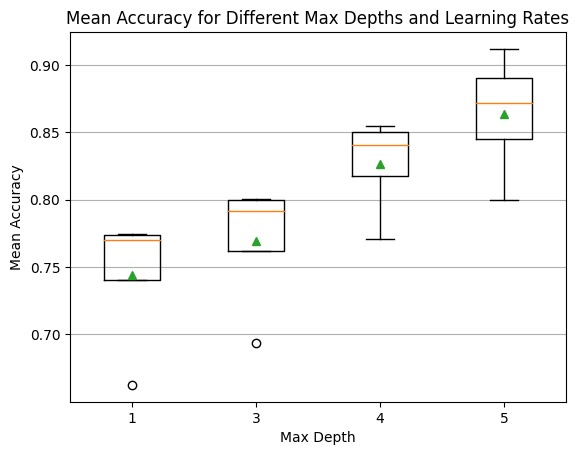

In [ ]:
results = grid_result.cv_results_['mean_test_score'].reshape(len(param_grid['base_estimator__max_depth']), len(param_grid['learning_rate']))
plt.boxplot(results, labels=[str(p) for p in param_grid['base_estimator__max_depth']], showmeans=True)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy for Different Max Depths and Learning Rates')
plt.grid(axis='y')
plt.show()